In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_results = {}
files = os.listdir("ckpts")

for file in tqdm(files):
    path = os.path.join("ckpts", file)    
    with open(path, "rb") as fin:
        data = pkl.load(fin)
        
    for keys in data:
        all_results[keys] = all_results.get(keys, []) + data[keys]


100%|██████████| 5760/5760 [00:16<00:00, 355.75it/s] 


In [3]:
df = pd.DataFrame.from_dict(data=all_results)
df.head()

,n_points,offset,perc_outlier,window_amp,window_local,use_old,padding_amp_method,padding_local_method,padding_amp_side,f1,acc,rec
0,512,0,20,16,16,False,constant,constant,bilateral,0.640777,0.927734,0.647059
1,512,0,20,16,16,False,constant,constant,bilateral,0.737864,0.947266,0.745098
2,512,0,20,16,16,False,constant,constant,bilateral,0.776699,0.955078,0.784314
3,512,0,20,16,16,False,constant,constant,bilateral,0.640777,0.927734,0.647059
4,512,0,20,16,16,False,constant,constant,bilateral,0.660194,0.931641,0.666667


In [4]:
df['version'] = df[
            ['use_old', 'padding_amp_method', 'padding_local_method', 'padding_amp_side']
        ].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Display results

The purpose of the experiments is to evaluate the old implementation against the current one. 
The current implementation included new padding techniques to avoid biasing the convoluted signal in both frequency and time domain.

We used the following encoding: use_old, padding_amp_method, padding_local_method.

* Ex1: **False, replicate, reflect** corresponds to **use_old=False, padding_amp_method=replicate, padding_local_method=reflect**

* Ex2. **True** corresponds to **use_old=True** (old implementation is used)

### signal size vs F1

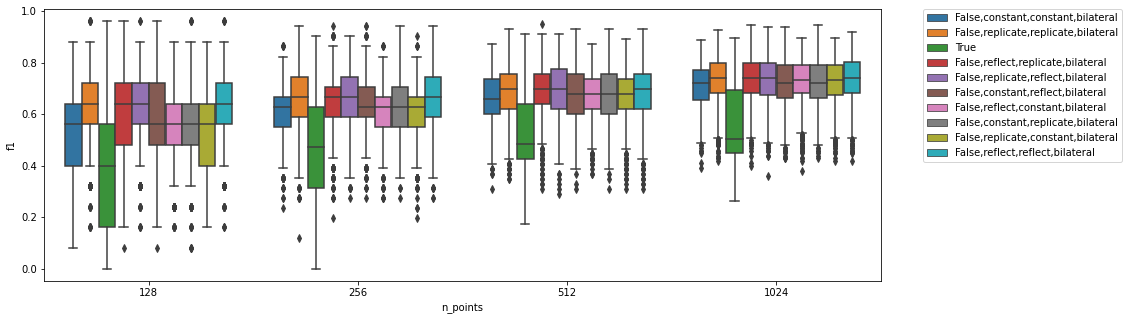

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x="n_points", y="f1", hue="version")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
# df.groupby(['n_points', 'version']).mean()['f1']

### offset vs F1

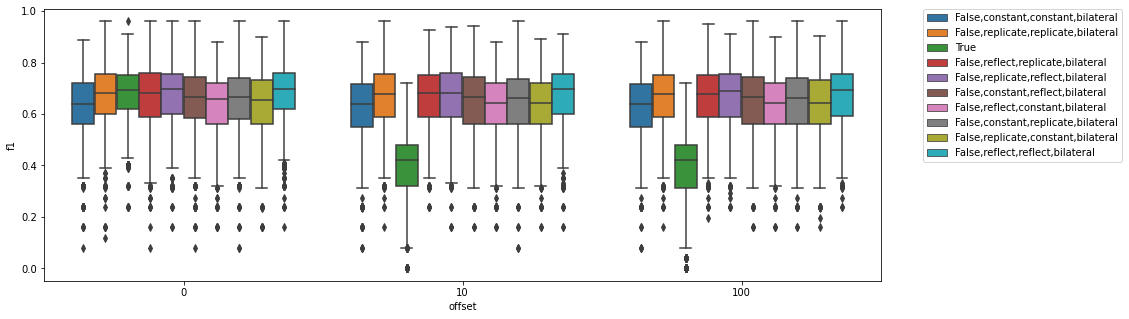

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x="offset", y="f1", hue="version")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### window amp vs F1

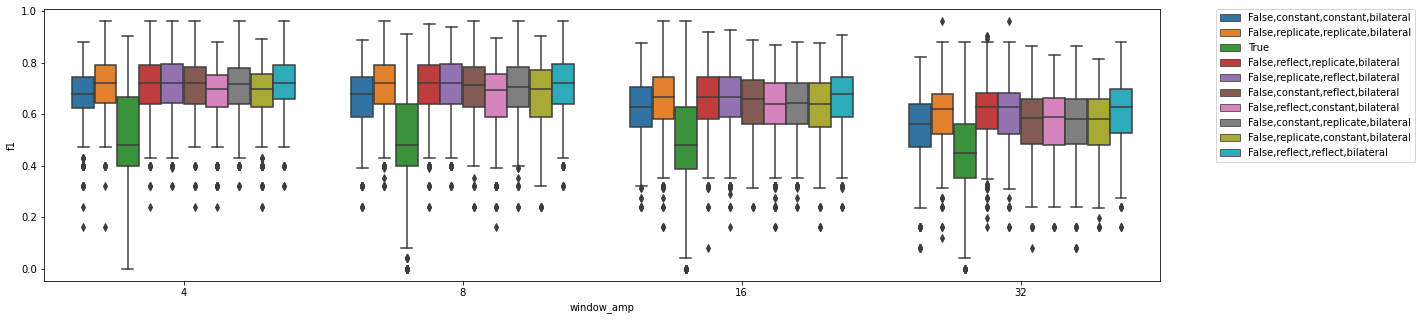

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x="window_amp", y="f1", hue="version")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### window local vs F1

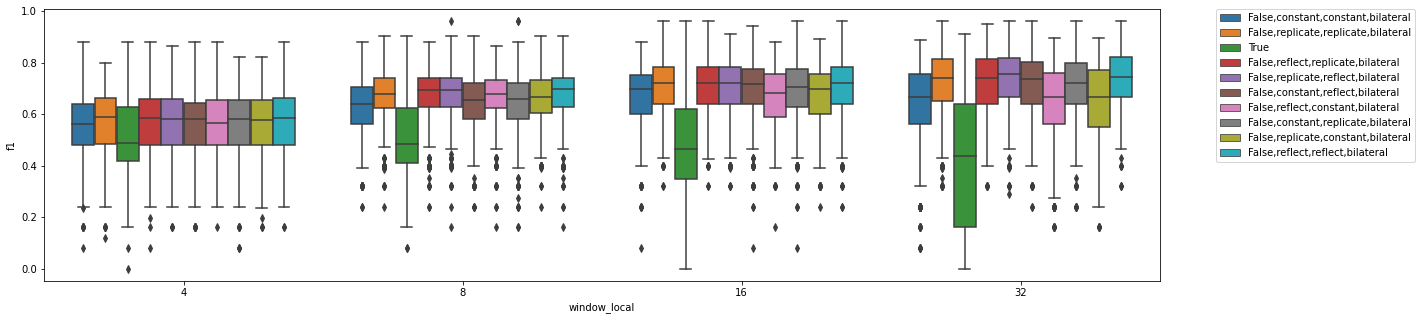

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x="window_local", y="f1", hue="version")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### prec outlier vs F1

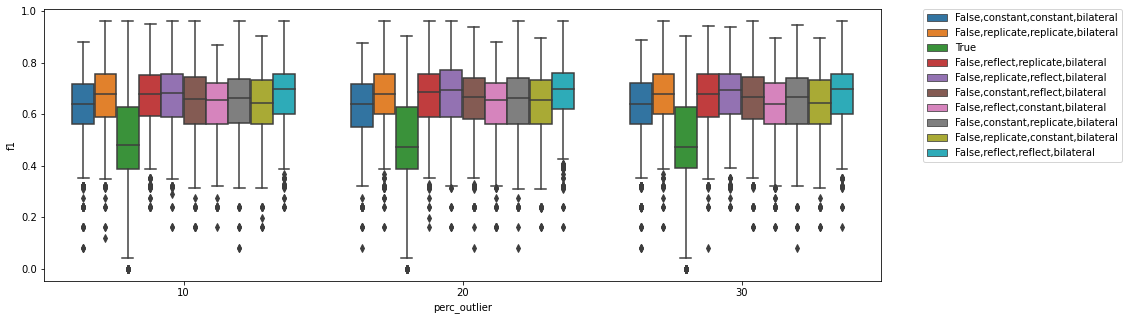

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x="perc_outlier", y="f1", hue="version")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)